<h5 align="center">Metody Obliczeniowe w Nauce i Technice </h5>
<h6 align="center">Labolatorium 6</h6>
<h6 align="center"> Rozwiązywanie układów równań liniowych</h6>


<b>Zadanie 1 Metoda Gaussa-Jordana </b> <br><hr>
Napisz i sprawdź funkcję rozwiązującą układ równań liniowych n×n metodą GaussaJordana. Dla rozmiarów macierzy współczynników większych niż 500×500 porównaj czasy działania zaimplementowanej funkcji z czasami uzyskanymi dla wybranych funkcji bibliotecznych.

In [1]:
from numpy.linalg import solve
from numpy.linalg import lstsq
from math import fabs
from scipy.linalg import lu
import time

* Pomocnicza funkcja wypisująca macierz

In [2]:
def wyswietl(mat):
    for i in mat:
        for j in i:
            print(j, end=' ')
        print()

* Ładujemy macierz 600x600

In [4]:
with open('macierz.txt') as f:
    w, h = [float(x) for x in next(f).split()]
    matrix = [[float(x) for x in line.split()] for line in f]

with open('left_side.txt') as f:
    w, h = [float(x) for x in next(f).split()]
    left_side = [[float(x) for x in line.split()] for line in f]
    left_side = left_side[0]


* Definiujemy dunkcje pomocnicze

In [5]:
def row_operation(row, func, ls, n):
    for i, r in enumerate(row):
        row[i] = func(row[i])
    ls[n] = func(ls[n])


def check_is_zero(m, n, eps, ls):
    while abs(m[n][n]) < eps:
        for h, w in enumerate(m):
            if w[n] != 0 and h > n:
                for j, p in enumerate(w):
                    m[n][j] = m[n][j] + w[j]
                ls[n] = ls[n] + ls[h]

* Właściwa funkcja

In [6]:
def solve_matrix():
    for i, r in enumerate(matrix):
        check_is_zero(matrix, i, 0.0001, left_side)
        to_divide = matrix[i][i]
        row_operation(matrix[i], lambda x: x / to_divide, left_side, i)

        for j, k in enumerate(matrix):
            if j != i:
                to_multiply = matrix[j][i]
                left_side[j] = left_side[j] - to_multiply * left_side[i]
                for p, r in enumerate(k):
                    matrix[j][p] = matrix[j][p] - to_multiply * matrix[i][p]


* Mierzymy czas wykonania

In [8]:
start = time.process_time()
solve_matrix()
end = time.process_time()
print("Time spent in above function is:", end - start)
print("Rozwiazanie:")
print(left_side)

Time spent in above function is: 42.203125
Rozwiazanie:
[-0.24566324789453564, 0.262427761738061, 0.508405570196695, -1.329230509166639, -0.8845281499354845, 0.17540769410578363, -2.41066858591807, 0.1896750100647991, 0.6085498848621749, -0.3258178255651104, -0.4621831766771385, 1.8368006417697635, 0.2809675274463266, 0.11933722453482687, 0.8664604044284099, -0.019897554131354633, 0.5576710594458235, 1.6480848465106024, 0.5422079542496923, -1.7100398520147249, -0.0532579671194186, -0.9237632196727847, 1.4064894553230816, -0.25822720511593267, -0.8707360536538915, 0.09303130518924557, 0.11124978222569498, 0.09153307588737729, 0.7964622505255198, -0.6442270275377509, -0.8205994346117098, 0.7841855021097528, -0.7720281595200983, -0.9516758607056283, 0.536319169809768, -0.603454426271094, 0.2064502777956208, 0.41318320978309586, 0.13061356893293274, -0.7951731170910203, 0.9731362660076021, 0.850769232138197, 0.04550709704497202, -1.5106557012192074, 1.6976958548733603, -0.9494823617146653,

* Proównujemy czas z funkcjami bibliotecznymi

* W tym celu ponownie ładujemy pliki

In [9]:
with open('macierz.txt') as f:
    w, h = [float(x) for x in next(f).split()]
    matrix = [[float(x) for x in line.split()] for line in f]

with open('left_side.txt') as f:
    w, h = [float(x) for x in next(f).split()]
    left_side = [[float(x) for x in line.split()] for line in f]
    left_side = left_side[0]

* Dla numpy.linalg.solve

In [10]:
# numpy.linalg.solve
print("Dla funkcji bibliotecznej numpy.linalg.solve")
start = time.process_time()
result = solve(matrix, left_side)
end = time.process_time()
print("Time spent in above function is:", end - start)
print("Rozwiazanie:")
list(result)
print(result)

Dla funkcji bibliotecznej numpy.linalg.solve
Time spent in above function is: 0.046875
Rozwiazanie:
[-0.24566325  0.26242776  0.50840557 -1.32923051 -0.88452815  0.17540769
 -2.41066859  0.18967501  0.60854988 -0.32581783 -0.46218318  1.83680064
  0.28096753  0.11933722  0.8664604  -0.01989755  0.55767106  1.64808485
  0.54220795 -1.71003985 -0.05325797 -0.92376322  1.40648946 -0.25822721
 -0.87073605  0.09303131  0.11124978  0.09153308  0.79646225 -0.64422703
 -0.82059943  0.7841855  -0.77202816 -0.95167586  0.53631917 -0.60345443
  0.20645028  0.41318321  0.13061357 -0.79517312  0.97313627  0.85076923
  0.0455071  -1.5106557   1.69769585 -0.94948236 -2.35908549 -1.91729843
  0.9993834  -1.07636422 -0.24524672 -0.94396855  0.37837139  0.78296544
  1.20069029  1.29202442 -0.82612385 -0.05678052  0.98351787 -0.38916354
  0.30483275 -0.21803043  0.47873472  1.5924985  -1.07728808  2.16510621
  0.99885003 -0.87160769  0.77459398  0.30425412 -0.70080509 -1.74035447
 -1.47740183  0.97223195

* Dla numpy.linalg.lstsq

In [11]:
print("Dla funkcji bibliotecznej numpy.linalg.lstsq")
start = time.process_time()
result = lstsq(matrix, left_side, rcond=None)
end = time.process_time()
print("Time spent in above function is:", end - start)
print("Rozwiazanie:")
list(result)
print(result)

Dla funkcji bibliotecznej numpy.linalg.lstsq
Time spent in above function is: 0.3125
Rozwiazanie:
(array([-0.24566325,  0.26242776,  0.50840557, -1.32923051, -0.88452815,
        0.17540769, -2.41066859,  0.18967501,  0.60854988, -0.32581783,
       -0.46218318,  1.83680064,  0.28096753,  0.11933722,  0.8664604 ,
       -0.01989755,  0.55767106,  1.64808485,  0.54220795, -1.71003985,
       -0.05325797, -0.92376322,  1.40648946, -0.25822721, -0.87073605,
        0.09303131,  0.11124978,  0.09153308,  0.79646225, -0.64422703,
       -0.82059943,  0.7841855 , -0.77202816, -0.95167586,  0.53631917,
       -0.60345443,  0.20645028,  0.41318321,  0.13061357, -0.79517312,
        0.97313627,  0.85076923,  0.0455071 , -1.5106557 ,  1.69769585,
       -0.94948236, -2.35908549, -1.91729843,  0.9993834 , -1.07636422,
       -0.24524672, -0.94396855,  0.37837139,  0.78296544,  1.20069029,
        1.29202442, -0.82612385, -0.05678052,  0.98351787, -0.38916354,
        0.30483275, -0.21803043,  0.4

<b>Wnioski:</b><br> Czasy wykonania dla macierzy 600x600 w pównaniu z funkcjami bibliotecznymi jest o wiele dłuższy. 
* 42.2s - własna funkcja
* 0.046875 - umpy.linalg.solve
* 0.3125 - numpy.linalg.lstsq


<b>Zadanie 2 Faktoryzacja LU</b> <br><hr>
Napisz i sprawdź funkcję dokonującą faktoryzacji <b>A</b> = <b>LU</b> macierzy <b>A</b>. Zastosuj częściowe poszukiwanie elementu wiodącego oraz skalowanie.


* Otwieramy plik macierzy do faktoryzacji

In [12]:
with open('faktoryzacja.txt') as f:
    w, h = [float(x) for x in next(f).split()]
    A = [[float(x) for x in line.split()] for line in f]

In [13]:
wyswietl(A)

2.0 4.0 1.0 1.0 
1.0 2.0 3.0 1.0 
0.0 1.0 2.0 -1.0 
-1.0 1.0 0.0 1.0 


* Funckja generująca macierz trójkatną z zerami

In [15]:
def triangular_matrix(n, down=False):
    A = []
    for i in range(n):
        A.append([])
        for j in range(n):
            A[i].append(0)
    if down:
        for i in range(n):
            A[i][i] = 1
    return A

* Funkcja zamieniająca kolejnością wiersze

In [17]:
def change_rows(M, r1, r2, n):
    for i in range(n):
        tmp = M[r1][i]
        M[r1][i] = M[r2][i]
        M[r2][i] = tmp

* Funkcka mnożąca wiersze

In [19]:
def multiply_rows(A, B, x, y, N):
    sum = 0
    for j in range(N):
        sum += A[x][j] * B[j][y]
    return sum

* Funckja znajdująca element wiodący w kolumnie

In [20]:
def find_pivot(M, L, U, col, N, perm_A):
    if col == N - 1:
        return

    # OBLICZANIE WAEROSCI DO POSZUKIWANIA ELEMENTU WIODACEGO
    left = []
    for i in range(N):
        sum = 0
        if i >= col:
            for j in range(col):
                sum += L[i][j] * U[j][col]
            left.append(M[i][col] - sum)
        else:
            left.append(0)

    # SZUKANIE ELEMENTU WIODACEGO
    ret = 0
    for i, e in enumerate(left):
        if fabs(left[i]) > fabs(left[ret]):
            ret = i
    if (ret > col):
        change_rows(L, col, ret, col)
        change_rows(M, col, ret, N)
        # ZAPISYWANIE PERMUTACJI
        tmp = perm_A[col]
        perm_A[col] = perm_A[ret]
        perm_A[ret] = tmp

* Funkcja właściwa

In [21]:
def crout_alg(M):
    N = len(M)
    L = triangular_matrix(N, True)
    U = triangular_matrix(N)
    perm_A = [i for i in range(N)]

    # DLA KAZDEJ KOLUMNY
    for i in range(N):
        # UZUPELNIANIE MACIERZY U
        for j in range(N):
            if j < i:
                U[j][i] = M[j][i] - multiply_rows(L, U, j, i, N)

        # CZESCIOWE POSZUKIWANIE ELEMENTU WIODACEGO
        find_pivot(M, L, U, i, N, perm_A)

        # UZUPELNIANIE ELEMENATU U[i][i]
        U[i][i] = (M[i][i] - multiply_rows(L, U, i, i, N))
        div = U[i][i]

        # UZUPELNIANIE MACIERZY L
        for j in range(N):
            if j > i:
                L[j][i] = (M[j][i] - multiply_rows(L, U, j, i, N)) / div

    return L, U, perm_A

* Wykonanie

In [24]:
(L, U, perm_A) = crout_alg(A)

In [27]:
wyswietl(L)
print()
wyswietl(U)
print("Permutacja macierzy A: ", perm_A)
print("Są to liczby w tablicy oznaczaja kolejnosc wierszy w permutowanej macierzy względem oryginału")


1 0 0 0 
-0.5 1 0 0 
0.5 0.0 1 0 
0.0 0.3333333333333333 0.7333333333333333 1 

2.0 4.0 1.0 1.0 
0 3.0 0.5 1.5 
0 0 2.5 0.5 
0 0 0 -1.8666666666666667 
Permutacja macierzy A:  [0, 3, 1, 2]
Są to liczby w tablicy oznaczaja kolejnosc wierszy w permutowanej macierzy względem oryginału


* Prównujemy wynik z funkcją biblioteczną

In [28]:
with open('faktoryzacja.txt') as f:
    w, h = [float(x) for x in next(f).split()]
    A = [[float(x) for x in line.split()] for line in f]

p, l, u = lu(A, permute_l=False)

wyswietl(l)
print()
wyswietl(u)
print("Peruatation matrix A: ", p)

1.0 0.0 0.0 0.0 
-0.5 1.0 0.0 0.0 
0.5 0.0 1.0 0.0 
0.0 0.3333333333333333 0.7333333333333333 1.0 

2.0 4.0 1.0 1.0 
0.0 3.0 0.5 1.5 
0.0 0.0 2.5 0.5 
0.0 0.0 0.0 -1.8666666666666667 
Peruatation matrix A:  [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


<b>Wnioski:</b><br>
* Przewaga rozkładu LU nad eliminacją Gaussa polega na tym, iż przy pomocy rozkładu LU mozna rozwiązywać dowolnie wiele równań z takimi sa- mymi lewymi stronami (macierzami), przy czym "kosztowna" częsść, a więc sama faktoryzację oblicza się tylko raz.
* Faktoryzacja LU nie wymaga de facto rozwiązywania skomplikowanego układu równan, jako że każde z rozwiązywanych równań jest równaniem z jedną niewiadomą, jesli tylko macierz A jest przeglądana we własciwej kolejności. Obliczenie jednego elementu wymaga O(N) operacji, wszystkich elementów jest N^2, zatem koszt obliczeniowy faktoryzacji LU jest rzędu O(N^3).
* Na skutek zastosowania wyboru elementu podstawowego dostajemy nie faktoryzację wejsciowej macierzy A, lecz faktoryzację macierzy rózniącej się od macierzy wejściowej kolejnością wierszy. Trzeba zapamiętać permutację wierszy, jako że przy rozwiązywaniu równania Ax = B trzeba zastosowac tę samą permutację elementów wektora b

<b>Zadanie 3 Analiza obwodu elektrycznego</b> <br><hr>
Napisz program, który:
* Wczytuje z pliku listę krawędzi grafu opisującego obwód elektryczny. Wagi krawędzi określają opór fragmentu obwodu między dwoma węzłami. Wierzchołki grafu identyﬁkowane są przez liczby naturalne.
* Wczytuje dodatkowo trójkę liczb (s,t,E), przy czym para (s,t) wskazuje między którymi węzłami sieci przyłożono siłę elektromotoryczną E. Opór wewnętrzny SEM można zaniedbać.
* Wykorzystując prawa Kirchhoﬀa znajduje natężenia prądu w każdej części obwodu i przedstawia je na rysunku w postaci grafu ważonego z etykietami.
* Wykorzystując metodę potencjałów węzłowych zaimplementuj alternatywne rozwiązanie problemu.
* Przedstaw (wizualizacja + sprawdzenie poprawności wyników) działanie programu dla grafów spójnych mających od 15 do 100 wierzchołków: 


Spójny graf losowy<br>
Graf 3-regularny (kubiczny)<br>
Graf złożony z dwóch grafów losowych połączonych mostkiem 
Graf siatka 2D

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

* Wizualizacja grafów

In [44]:
def show_graph(G):
    # To show arrows
    G = G.to_directed()

    ebunch = []

    for i,e in enumerate(G.edges):
        u, v = e
        if (u,v) not in ebunch and (v,u) not in ebunch:
            ebunch.append((u,v))

    G.remove_edges_from(ebunch)
    pos = nx.planar_layout(G)

    nx.draw_planar(G, with_labels=True, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, with_labels=True, font_weight='bold', edge_labels=labels)
    plt.show()


* Wizualizacja mecierzy

In [33]:
def show_matrix(mat):
    for i in mat:
        for j in i:
            print(j, end=' ')
        print()
    print()

* Wczytywanie grafu z pliku (rezystancje i źródła napięciowe)

In [55]:
def open_graph(file_with_resistance, file_with_voltage):
    with open(file_with_resistance) as f:
        w, h = [float(x) for x in next(f).split()]
        R_load = [[float(x) for x in line.split()] for line in f]

    with open(file_with_voltage) as f:
        w, h = [float(x) for x in next(f).split()]
        V_load = [[float(x) for x in line.split()] for line in f]
    
    print("Rezystancje:")
    show_matrix(R_load)
    print("Napięcia:")
    show_matrix(V_load)
    
    return R_load, V_load

* Funkcja rozwiązująca układ wykorzystujać prawa Kirhoffa

In [56]:
def find_current_kirchhoff(R_load, V_load):
    N = int(max([x[0] for x in R_load] + [x[1] for x in R_load]) + 1)
    K = len(R_load)

    R = nx.Graph()
    R.add_nodes_from([x for x in range(N)])
    for e in R_load:
        R.add_edge(int(e[0]), int(e[1]), weight=e[2])

    direct = [[0 for i in range(N)] for x in range(N)]
    resistance = [[0 for i in range(N)] for x in range(N)]
    voltage = [[0 for i in range(N)] for x in range(N)]
    edges = {}
    equations = []
    m_row = 0
    right_side = []

    # zakladamy ze jak wczytujemy 1 2 8 too prad plynie od 1 do 2 z rezystancja 8

    for i, e in enumerate(R_load):
        direct[int(e[0])][int(e[1])] = 1
        direct[int(e[1])][int(e[0])] = -1
        resistance[int(e[0])][int(e[1])] = e[2]
        resistance[int(e[1])][int(e[0])] = -e[2]
        # Indexing edges
        edges[(e[0], e[1])] = i
        edges[(e[1], e[0])] = i

    for e in V_load:
        voltage[int(e[0])][int(e[1])] = e[2]
        voltage[int(e[1])][int(e[0])] = -e[2]

    # II Kirchoff law
    cycles = nx.cycle_basis(R)

    for cycle in cycles:
        sum_voltage = 0
        equations.append([0 for x in range(K)])
        for i, node in enumerate(cycle):
            node_1 = cycle[i]
            node_2 = cycle[((i + 1) % len(cycle))]
            edge = edges[(node_1, node_2)]
            sum_voltage += voltage[node_1][node_2]
            equations[m_row][edge] = resistance[node_1][node_2]

        m_row += 1
        right_side.append(sum_voltage)

    # I Kirchoff law
    for n, node in enumerate(direct):
        equations.append([0 for x in range(K)])
        right_side.append(0)
        for n2, node_2 in enumerate(node):
            if node_2 != 0:
                equations[m_row][edges[(n, n2)]] = node_2
        m_row += 1

    print("Równania macierzowe")
    show_matrix(equations)
    print("Wektor napieć:")
    print(right_side)

    solution, x, y, z = np.linalg.lstsq(equations, right_side)
    print("Rozwiązanie:")
    print(solution)

    for (a, b) in R.edges:
        R[a][b]['weight'] = round(solution[edges[(a, b)]], 5)

    return R

W instrukcji jest napisane żeby sprawdzić dla 15 - 100 wierzchołków, ale jest to małoc czytelne dlatego wykorzystam mniej

<hr>

* Dla grafu losowego

In [58]:
R, V = open_graph('circuit_resistance.txt', 'curcuit_voltage.txt')

Rezystancje:
0.0 1.0 1.0 
0.0 2.0 1.0 
3.0 0.0 1.0 
2.0 1.0 1.0 
1.0 3.0 1.0 
3.0 2.0 1.0 

Napięcia:
3.0 0.0 1.0 
3.0 2.0 3.0 



Równania macierzowe
1.0 0 1.0 0 1.0 0 
0 1.0 1.0 0 0 -1.0 
1.0 -1.0 0 -1.0 0 0 
1 1 -1 0 0 0 
-1 0 0 -1 1 0 
0 -1 0 1 0 -1 
0 0 1 0 -1 1 

Wektor napieć:
[1.0, -2.0, 0, 0, 0, 0, 0]
Rozwiązanie:
[ 0.25 -0.5  -0.25  0.75  1.    1.25]


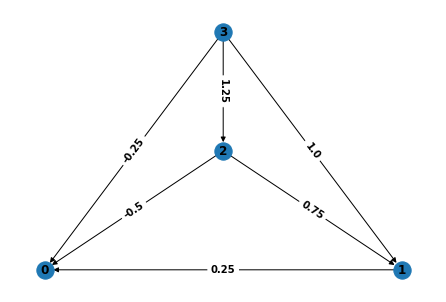

In [59]:
G = find_current_kirchhoff(R, V)
show_graph(G)

Powyższy przykład, rozwiązany ręcznie (notatki z elektroniki z mojego technikum):

<img src="img/random_2.jpg">
<img src="img/random_1.jpg">
<img src="img/random_3.jpg">

Jak widać poniżej wyniki zgadzają się z obliczeniami:

<img src="img/random_4.JPG">

<hr>

* Dla grafu kubicznego

In [60]:
R, V = open_graph('cube_resistance.txt', 'cube_voltage.txt')

Rezystancje:
0.0 1.0 1.0 
0.0 3.0 1.0 
0.0 4.0 1.0 
1.0 2.0 1.0 
1.0 5.0 1.0 
2.0 3.0 1.0 
2.0 6.0 1.0 
3.0 7.0 1.0 
7.0 6.0 1.0 
7.0 4.0 1.0 
4.0 5.0 1.0 
5.0 6.0 1.0 

Napięcia:
0.0 1.0 12.0 



Równania macierzowe
1.0 0 -1.0 0 1.0 0 0 0 0 0 -1.0 0 
0 0 0 0 0 0 0 0 1.0 -1.0 -1.0 -1.0 
0 0 0 1.0 -1.0 0 1.0 0 0 0 0 -1.0 
0 1.0 -1.0 0 0 -1.0 1.0 0 0 0 -1.0 -1.0 
0 1.0 -1.0 0 0 0 0 1.0 0 1.0 0 0 
1 1 1 0 0 0 0 0 0 0 0 0 
-1 0 0 1 1 0 0 0 0 0 0 0 
0 0 0 -1 0 1 1 0 0 0 0 0 
0 -1 0 0 0 -1 0 1 0 0 0 0 
0 0 -1 0 0 0 0 0 0 -1 1 0 
0 0 0 0 -1 0 0 0 0 0 -1 1 
0 0 0 0 0 0 -1 0 -1 0 0 -1 
0 0 0 0 0 0 0 -1 1 1 0 0 

Wektor napieć:
[12.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Rozwiązanie:
[ 5.  -2.5 -2.5  2.5  2.5  2.   0.5 -0.5 -1.   0.5 -2.   0.5]


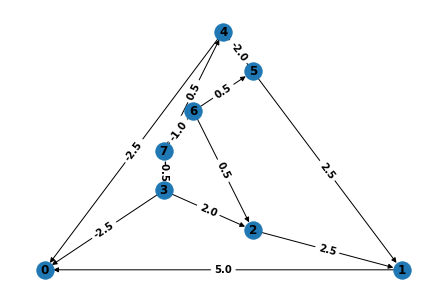

In [61]:
G = find_current_kirchhoff(R, V)
show_graph(G)

<hr>


* Dla dwóch losowych grafów połąćzonych mostem

In [62]:
R, V = open_graph('2_random_with_bridge.txt', '2_random_with_bridge_voltage.txt')


Rezystancje:
0.0 1.0 4.0 
1.0 2.0 4.0 
2.0 3.0 3.0 
3.0 4.0 2.0 
4.0 0.0 12.0 
3.0 5.0 2.0 
5.0 6.0 4.0 
6.0 7.0 4.0 
7.0 8.0 3.0 
8.0 9.0 3.0 
9.0 5.0 3.0 

Napięcia:
1.0 2.0 230.0 



Równania macierzowe
0 0 0 0 0 0 4.0 4.0 3.0 3.0 3.0 
4.0 4.0 3.0 2.0 12.0 0 0 0 0 0 0 
1 0 0 0 -1 0 0 0 0 0 0 
-1 1 0 0 0 0 0 0 0 0 0 
0 -1 1 0 0 0 0 0 0 0 0 
0 0 -1 1 0 1 0 0 0 0 0 
0 0 0 -1 1 0 0 0 0 0 0 
0 0 0 0 0 -1 1 0 0 0 -1 
0 0 0 0 0 0 -1 1 0 0 0 
0 0 0 0 0 0 0 -1 1 0 0 
0 0 0 0 0 0 0 0 -1 1 0 
0 0 0 0 0 0 0 0 0 -1 1 

Wektor napieć:
[0, 230.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Rozwiązanie:
[ 9.20000000e+00  9.20000000e+00  9.20000000e+00  9.20000000e+00
  9.20000000e+00 -1.83017202e-15  1.29650449e-15  8.72053493e-16
 -3.54002396e-15 -7.81878870e-16  5.69007372e-15]


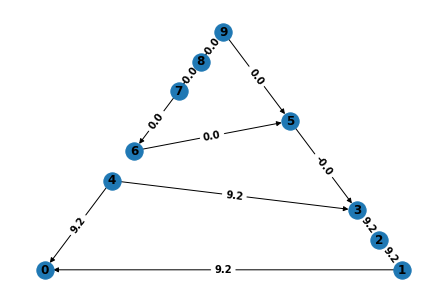

In [63]:
G = find_current_kirchhoff(R, V)
show_graph(G)

Ja widac prad plynie tylko w dolnym grafie, jest to spowodowane tym ze napiecie zostło przyłożone mięzy węzeł 1 i 3. Płynie prąd rzędu 9A bo przyłożone napięcie to 230V, a rezystancje są rzedu kilku omów.

<hr>

* Dla siatki rezystorów

In [66]:
R, V = open_graph('2d_sieve_resistance.txt', '2d_sieve_voltage.txt')

Rezystancje:
1.0 2.0 2.0 
2.0 3.0 2.0 
3.0 4.0 2.0 
5.0 6.0 3.0 
6.0 7.0 3.0 
7.0 8.0 3.0 
9.0 10.0 4.0 
10.0 11.0 4.0 
11.0 12.0 4.0 
13.0 14.0 5.0 
14.0 15.0 5.0 
15.0 16.0 5.0 
1.0 5.0 6.0 
5.0 9.0 6.0 
9.0 13.0 6.0 
2.0 6.0 7.0 
6.0 10.0 7.0 
10.0 14.0 7.0 
3.0 7.0 8.0 
7.0 11.0 8.0 
11.0 15.0 8.0 
4.0 8.0 9.0 
8.0 12.0 9.0 
12.0 16.0 9.0 

Napięcia:
1.0 2.0 5.0 
13.0 14.0 10.0 



Równania macierzowe
0 0 0 0 0 0 4.0 0 0 -5.0 0 0 0 0 -6.0 0 0 7.0 0 0 0 0 0 0 
0 0 0 0 0 0 0 4.0 0 0 -5.0 0 0 0 0 0 0 -7.0 0 0 8.0 0 0 0 
0 0 0 3.0 3.0 0 0 0 0 -5.0 -5.0 0 0 -6.0 -6.0 0 0 0 0 8.0 8.0 0 0 0 
2.0 2.0 0 0 0 0 0 0 0 -5.0 -5.0 0 -6.0 -6.0 -6.0 0 0 0 8.0 8.0 8.0 0 0 0 
0 0 -2.0 0 0 3.0 0 0 0 0 0 0 0 0 0 0 0 0 8.0 0 0 -9.0 0 0 
0 0 0 0 0 -3.0 0 0 4.0 0 0 0 0 0 0 0 0 0 0 8.0 0 0 -9.0 0 
0 0 0 0 0 0 0 0 -4.0 0 0 5.0 0 0 0 0 0 0 0 0 8.0 0 0 -9.0 
0 0 0 3.0 0 0 -4.0 0 0 0 0 0 0 -6.0 0 0 7.0 0 0 0 0 0 0 0 
2.0 0 0 -3.0 0 0 0 0 0 0 0 0 -6.0 0 0 7.0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 
-1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 -1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 
0 0 -1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 
0 0 0 1 0 0 0 0 0 0 0 0 -1 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 -1 1 0 0 0 0 0 0 0 0 0 0 -1 1 0 0 0 0 0 0 0 
0 0 0 0 -1 1 0 0 0 0 0 0 0 0 0 0 0 0 -1 1 0 0 0 0 
0 0 0 0 0 -1 0 0 0 0 0 0

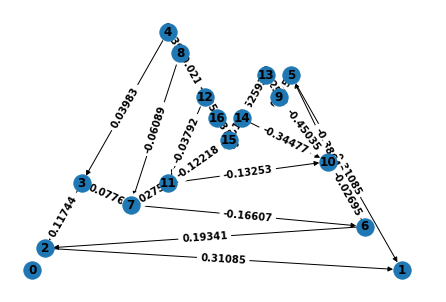

In [67]:
G = find_current_kirchhoff(R, V)
show_graph(G)

* metoda potencjałów węzłowych (brak)

<b>Wnioski:</b><br>
Rozwiązywaniu ukłądów równań liniowych za pomocą macierzy jest bardzo przydatne i szeroko wykorzystywane (jak ma to miejsce powyżej do rozwiązywania skomplikowanych obwodów elektronicznych)

<b>Źródła:</b><br>
http://th-www.if.uj.edu.pl/zfs/gora/metnum11/wyklad03.pdf <br>
https://www.youtube.com/watch?v=16Ns6zkb6Ng